#Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**Loading Dataset**

In [ ]:
df=pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#**EDA(Exploratory Data Analysis)**

In [ ]:
df.columns


Index(['Category', 'Message'], dtype='object')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

#**Data Cleaning**

In [ ]:
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "soâs":"so is",
    "soâve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yesâm":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [ ]:
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mfw" : "my face when",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def expand_cotractions(x):
  if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
  else:
    return x

In [ ]:
def expand_abbreviations(sentence):
    final_words=[]
    words=sentence.split()
    final_words= [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return " ".join(final_words)

In [ ]:
def clean_text(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,]","",text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [ ]:
cleaned1 = lambda x: clean_text(x)

In [ ]:
df['cleaned Message']=pd.DataFrame(df['Message'].apply(cleaned1))

In [ ]:
df['cleaned Message'].unique()

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply',
       ..., 'pity mood soany suggestions',
       'guy bitching acted like id interested buying something else next week gave us free',
       'rofl true name'], dtype=object)

#**Data Visualization**

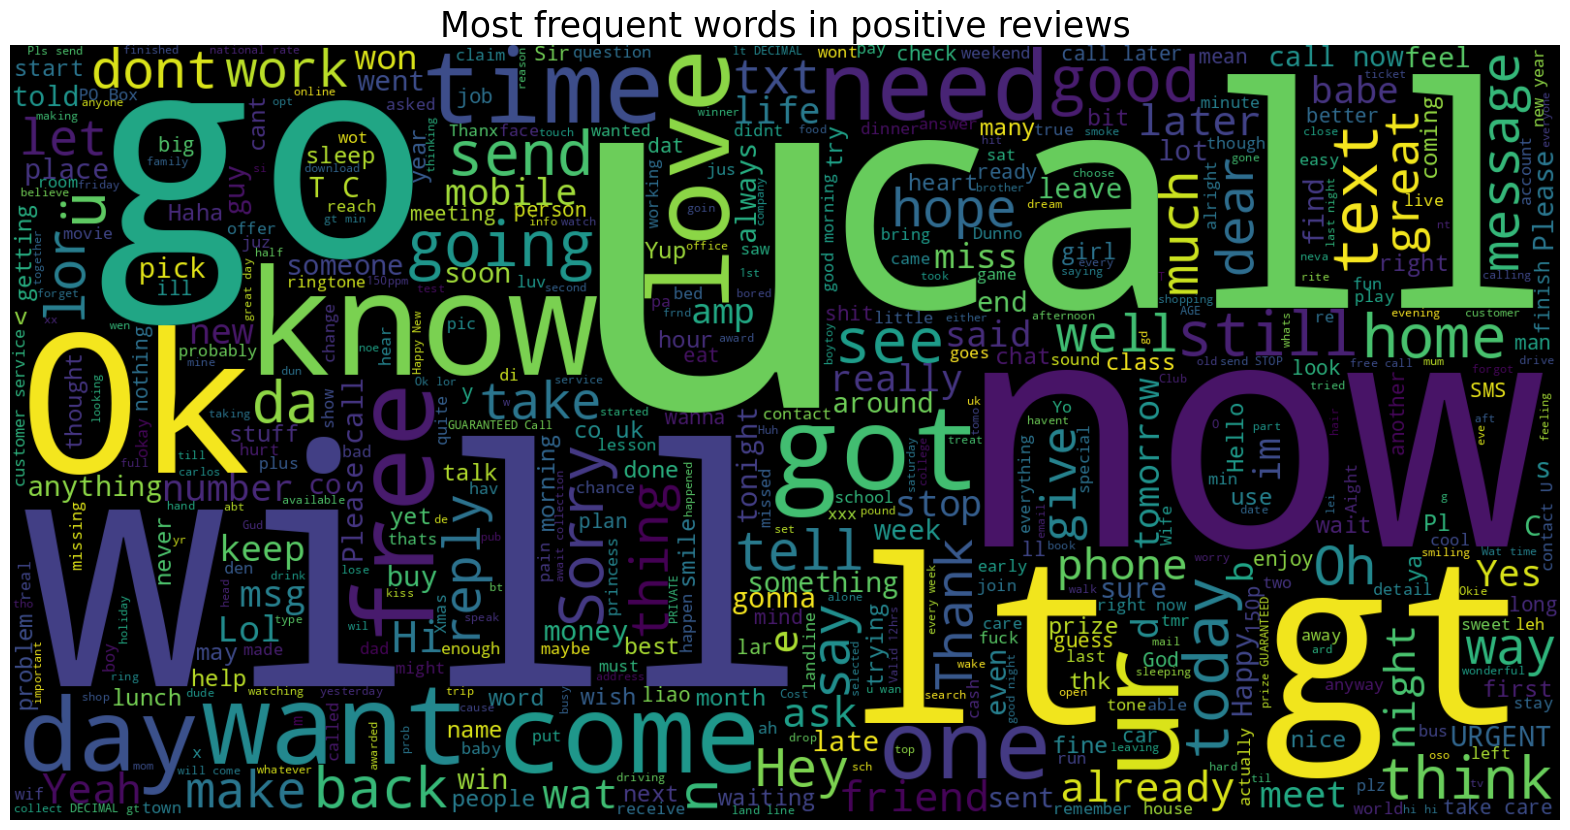

In [ ]:
text=' '.join([word for word in df['Message']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

<Axes: xlabel='Category', ylabel='Count'>

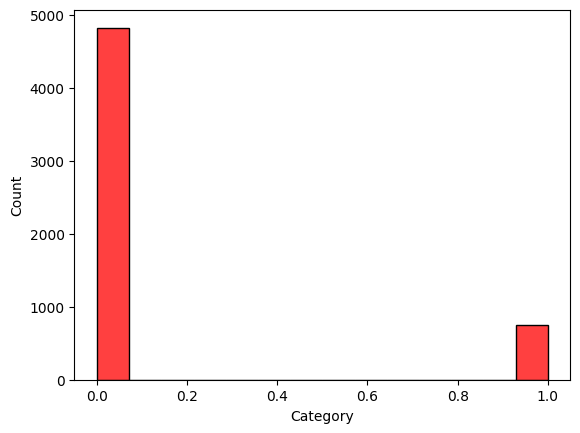

In [ ]:
sns.histplot(data=df,x='Category',color='r')

#**Data Splitting**

In [ ]:
x=df['Message']
y=df['Category']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=55,test_size=0.1)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(5014,)
(5014,)
(558,)
(558,)


In [ ]:
y.unique()

array([0, 1])

#Model Building

#1.Logistic Regression

In [ ]:
tvec=CountVectorizer()
clf=LogisticRegression(tol=0.01,max_iter=80,n_jobs=1,verbose=20,C=0.002)


In [ ]:
from sklearn.pipeline import Pipeline
model1=Pipeline([('Vectorizer',tvec),('Classifier',clf)])
model1.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s


Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier',
                 LogisticRegression(C=0.002, max_iter=80, n_jobs=1, tol=0.01,
                                    verbose=20))])

In [ ]:
p=model1.predict(xtrain)
p
a=accuracy_score(ytrain,p)*100
print('training accuracy:',round(a,2),"%")

training accuracy: 87.28 %


In [ ]:
p1=model1.predict(xtest)
p1
a1=accuracy_score(ytest,p1)*100
print('testing accuracy:',round(a1,2),"%")

testing accuracy: 86.02 %


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
confusion_matrix(ytest,p1)

array([[477,   0],
       [ 78,   3]])

<Axes: >

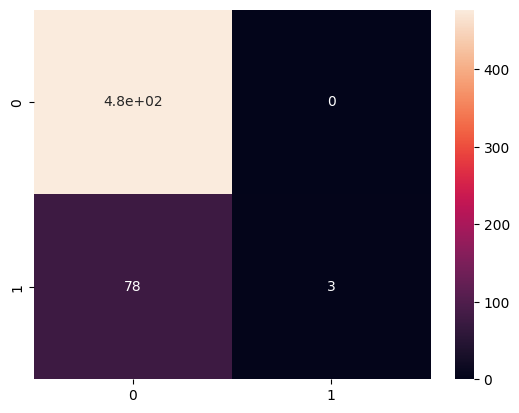

In [ ]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

#2.Random Forest Classifier

In [ ]:
clf1 = RandomForestClassifier(criterion='entropy')
model2 = Pipeline([('Vectorizer',tvec),('Classifier',clf1)])

In [ ]:

model2.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', RandomForestClassifier(criterion='entropy'))])

In [ ]:
p=model2.predict(xtrain)
p
a=accuracy_score(ytrain,p)*100
print('training accuracy:',round(a,2),"%")

training accuracy: 100.0 %


In [ ]:
p1=model2.predict(xtest)
p1
a1=accuracy_score(ytest,p1)*100
print('testing accuracy:',round(a1,2),"%")

testing accuracy: 97.67 %


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
confusion_matrix(ytest,p1)

array([[477,   0],
       [ 13,  68]])

<Axes: >

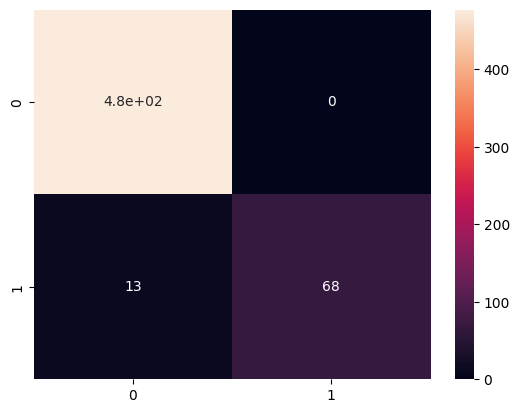

In [ ]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

# 3.SVM-SVC

In [ ]:
clf2 = SVC(probability=True)
model3 = Pipeline([('Vectorizer',tvec),('Classifier',clf2),])
model3.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', SVC(probability=True))])

In [ ]:

p=model3.predict(xtrain)
p
a=accuracy_score(ytrain,p)*100
print('training accuracy:',round(a,2),"%")

training accuracy: 99.52 %


In [ ]:
p1=model3.predict(xtest)
p1
a1=accuracy_score(ytest,p1)*100
print('testing accuracy:',round(a1,2),"%")

testing accuracy: 98.39 %


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
confusion_matrix(ytest,p1)

array([[477,   0],
       [  9,  72]])

<Axes: >

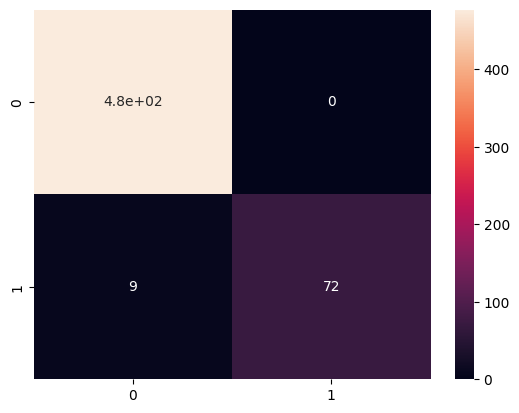

In [ ]:
sns.heatmap(confusion_matrix(ytest,p1),annot=True)

#**Predict_Proba**

In [ ]:
pred1=model1.predict_proba(xtest)
pred1

array([[0.90477199, 0.09522801],
       [0.86451004, 0.13548996],
       [0.90677026, 0.09322974],
       ...,
       [0.90047626, 0.09952374],
       [0.89485553, 0.10514447],
       [0.5707797 , 0.4292203 ]])

In [ ]:
pred2=model2.predict_proba(xtest)
pred1

array([[0.90477199, 0.09522801],
       [0.86451004, 0.13548996],
       [0.90677026, 0.09322974],
       ...,
       [0.90047626, 0.09952374],
       [0.89485553, 0.10514447],
       [0.5707797 , 0.4292203 ]])

In [ ]:
pred3=model3.predict_proba(xtest)
pred1

array([[0.90477199, 0.09522801],
       [0.86451004, 0.13548996],
       [0.90677026, 0.09322974],
       ...,
       [0.90047626, 0.09952374],
       [0.89485553, 0.10514447],
       [0.5707797 , 0.4292203 ]])

#roc_curve

In [ ]:
fpr,tpr,thresh=roc_curve(ytest,pred1[:,1],pos_label=1)
fpr1,tpr1,thresh1=roc_curve(ytest,pred2[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(ytest,pred3[:,1],pos_label=1)

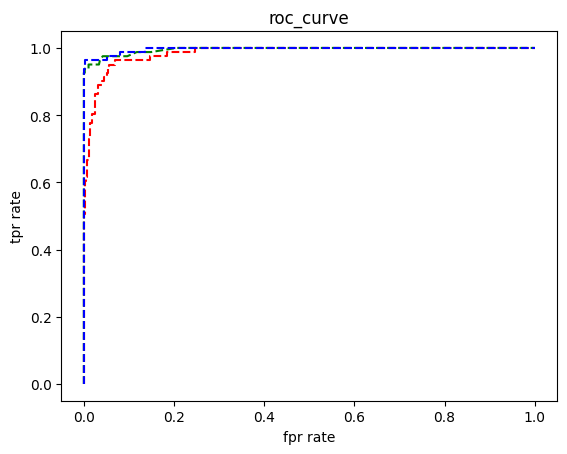

In [ ]:
plt.plot(fpr,tpr,'r--',label='logistic regression')
plt.plot(fpr1,tpr1,'g--',label='Random Forest Classifier')
plt.plot(fpr2,tpr2,'b--',label='SVC')
plt.xlabel('fpr rate')
plt.ylabel('tpr rate')
plt.title('roc_curve')
plt.show()


#**Roc_Auc_Score**

In [ ]:
roc_auc_score(ytest,pred1[:,1])

0.9841602608898206

In [ ]:
roc_auc_score(ytest,pred2[:,1])

0.9954318399461655

In [ ]:
roc_auc_score(ytest,pred3[:,1])

0.9966353495354194

#**Final Prediction Using the best Model**

In [ ]:
example=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s']
result = model2.predict(example)
print(result)

[1]


In [ ]:
if result[0]==0:
  Print('This is a Ham Mail')
else:
  print('This is a Spam Mail')

This is a Spam Mail
